<a href="https://colab.research.google.com/github/marziyeh-sa/Machine_Learning_Fall2020/blob/main/Hands_On/HO8_Clustering_ML2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Let's start with an example ...__

In [ ]:
import numpy as np
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

sample_size = 500
n_clusters  = 4

X, y = make_blobs(n_samples= sample_size, centers= n_clusters, cluster_std= 0.8, random_state=0)

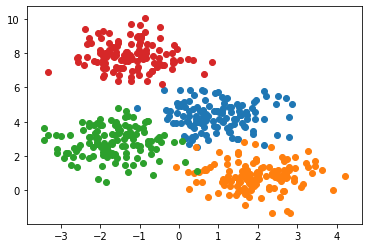

In [ ]:
for i in range(n_clusters):
    
    # get row indexes for samples with this cluster
    row_ix = where(y == i)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show the plot
plt.show()

**Clustering** or **cluster analysis** is an unsupervised learning problem.

It is often used as a data analysis technique for discovering interesting patterns in data, such as groups of customers based on their behavior.

There are many clustering algorithms to choose from and no single best clustering algorithm for all cases. Instead, it is a good idea to explore a range of clustering algorithms and different configurations for each algorithm.

In this tutorial, you will discover how to fit and use top clustering algorithms in python.

### Tutorial Overview:
<ul>
<li>K-means</li>
<li>Hierarchical Clustering</li>
<li>DBSCAN (Density Based Spatial Clustering of Applications with Noise)</li>
<li>Gaussian Mixture Models</li>
<li>Clustering Evaluation</li>
<ul>
    <li>Clustering Tendency</li>
    <li>Optimal Number of Clusters</li>
    <li>Clustering Quality</li>
    <ul>
        <li>Extrinsic Measures</li>
        <li>Intrinsic Measures</li>

</ul>



## <font color='red'>1. K-means</font>

The K-means algorithm aims to choose centroids that minimise the **inertia**, or **within-cluster sum-of-squares** criterion:
### <center> $\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$</center>
Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:
<ul>
<li>Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.</li>
<li>Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.</li>
</ul>
K-means has three steps:
<ol>
<li>The first step chooses the initial centroids, with the most basic method being to choose K samples from the dataset.</li>
<li>After initialization, K-means consists of looping between the two other steps. 
<ol>
<li>The first step assigns each sample to its nearest centroid. </li>
<li>The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.</li>
</ol>
</ol>


### <font color='green'>Advantages of Hierarchical Clustering:</font>
<ul>
<li><b><font color='blue'>Easy to understand.</font></b>
<li><b><font color='blue'>If data sets are distinct then gives the best results.</font></b>   
<li><b><font color='blue'>Better computational cost.</font></b>   
<li><b><font color='blue'>Works better with spherical clusters.</font></b>   



### <font color='red'>Disadvantages of Hierarchical Clustering:</font>
<ul>
<li><b><font color='blue'>Being dependent on initial values.</font></b>
<li><b><font color='blue'>If there are two highly overlapping data then it cannot be distinguished and cannot tell that there are two clusters</font></b>
<li><b><font color='blue'>Cannot handle outliers and noisy data.</font></b>
<li><b><font color='blue'>Sensitive to scale</font></b>
<li><b><font color='blue'>If very large data sets are encountered then the computer may crash.</font></b>    
    
     

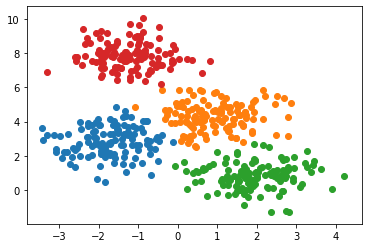

In [ ]:
from sklearn.cluster import KMeans

# define the model
model = KMeans(n_clusters= 4, random_state= 6)

# fit model and predict clusters
y_pred = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(y_pred)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_pred == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show the plot
plt.show()

## <font color='red'>2. Hierarchical Clustering</font>

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.<br>

The **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering">AgglomerativeClustering</a>** object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:
<ul>
<li><b>Ward</b> minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
<li><b>Maximum</b> or <b>complete linkage</b> minimizes the maximum distance between observations of pairs of clusters.
<li><b>Average linkage</b> minimizes the average of the distances between all observations of pairs of clusters.
<li><b>Single linkage</b> minimizes the distance between the closest observations of pairs of clusters.    
</ul>

### <font color='green'>Advantages of Hierarchical Clustering:</font>
<ul>
<li><b><font color='blue'>Easy to understand.</font></b>
<li><b><font color='blue'>The dendrogram produced is very useful in understanding the data.</font></b>     

### <font color='red'>Disadvantages of Hierarchical Clustering:</font>
<ul>
<li><b><font color='blue'>Arbitrary Decisions:</font></b> When using hierarchical clustering it is necessary to specify both the <b>distance metric</b> and the <b>linkage criteria</b>. There is rarely any strong theoretical basis for such decisions. A core principle of science is that findings are not the result of arbitrary decisions, which makes the technique of dubious relevance in modern research.
<li><b><font color='blue'>Missing Data:</font></b> Most hierarchical clustering software does not work with values are missing in the data.
<li><b><font color='blue'>Data Types:</font></b> With many types of data, it is difficult to determine how to compute a distance matrix. There is no straightforward formula that can compute a distance where the variables are both <b>numeric</b> and <b>qualitative</b> . For example, how can one compute the distance between a 45-year-old man, a 10-year-old-girl, and a 46-year-old woman? Formulas have been developed, but they involve arbitrary decisions.
<li><b><font color='blue'>Computational Complexity</font></b>
     

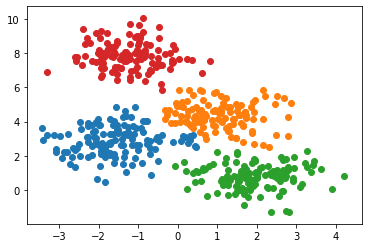

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# define the model
model = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
y_pred = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(y_pred)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_pred == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show the plot
plt.show()

### **Visualization of cluster hierarchy**

It’s possible to visualize the tree representing the hierarchical merging of clusters as a dendrogram. Visual inspection can often be useful for understanding the structure of the data, though more so in the case of small sample sizes.

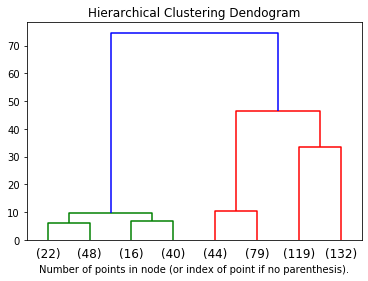

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)

# plot the top p levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=2)

plt.title('Hierarchical Clustering Dendogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [ ]:
from collections import Counter

Counter(y_pred).values() # counts the elements' frequency

dict_values([123, 119, 132, 126])

## <font color='red'>3. DBSCAN (Density Based Spatial Clustering of Applications with Noise)</font>

The **<a href="https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering">DBSCAN</a>** algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples).

There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say dense. Higher `min_samples` or `lower eps` indicate higher density necessary to form a cluster.

More formally, we define a core sample as being a sample in the dataset such that there exist min_samples other samples within a distance of eps, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples that can be built by recursively taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

Any core sample is part of a cluster, by definition. Any sample that is not a core sample, and is at least eps in distance from any core sample, is considered an outlier by the algorithm.


---
To understand and implement DBSCAN from scratch, we will need to know how DBSCAN is clustering the data. Along with Epsilon and Min Points, there are three more essential terms to understand:

<blockquote><b>Noise</b> — This is a point that does not have enough neighbors within epsilon to be part of a cluster (including itself).</blockquote>
<blockquote><b>Border Points</b> — This is a point that has neighbors within epsilon but not enough neighbors to be a core point. These points make up the edge of the cluster.</blockquote>
<blockquote><b>Core Points</b> — Points that have the Min Points required within epsilon (including itself). These points along with border points will form a cluster.</blockquote>

![alt text](./images/2.png "Title")

**How to choose the parameters `min_samples` and `eps`?**
<ul>
    <li>The parameter <b>min_samples</b> primarily controls how tolerant the algorithm is towards noise (on noisy and large data sets it may be desirable to increase this parameter)
    <li>the parameter <b>eps</b> is crucial to choose appropriately for the data set and distance function and usually cannot be left at the default value. It controls the local neighborhood of the points. When chosen too small, most data will not be clustered at all (and labeled as -1 for “noise”). When chosen too large, it causes close clusters to be merged into one cluster, and eventually the entire data set to be returned as a single cluster. Some heuristics for choosing this parameter have been discussed in the literature, for example based on a knee in the nearest neighbor distances plot (as discussed in the references below).
</ul>

### <font color='green'>Advantages of DBSCAN:</font>
<ul>
<li><b><font color='blue'>It requires minimal domain knowledge to determine the input parameters.</font></b> Other clustering algorithms like <b>KMeans</b> requires the user to know how many clusters exist in the data. Instead of requiring how many clusters should be found, DBSCAN requires the user to input <b>the maximum distance apart each point of data can be</b> to be considered part of a cluster and <b>how many data points it takes to form a cluster</b>.
<li><b><font color='blue'>It discovers clusters of any shape.</font></b> Since DBSCAN creates clusters based on epsilon and the number of neighbors each point has, it can find clusters of any shape. DBSCAN works best when <b>the clusters are of the same density (distance between points)</b>. When clusters of varying density are present, this can make it hard for DBSCAN to identify the clusters.       

### <font color='red'>Disdvantages of DBSCAN:</font>
<ul>
<li>While DBSCAN is great at separating high density clusters from low density clusters, <b><font color='blue'>DBSCAN struggles with clusters of similar density.</font></b>
<li><b><font color='blue'>Struggles with high dimensionality data.</font></b>

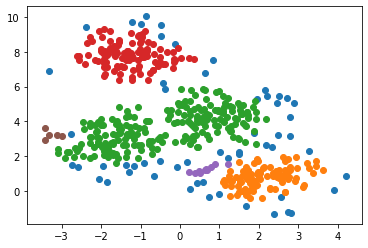

In [ ]:
from sklearn.cluster import DBSCAN

# define the model
model = DBSCAN(eps= 0.4, min_samples= 5)

# fit model and predict clusters
y_pred = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(y_pred)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_pred == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show the plot
plt.show()


## <font color='red'>4. Gaussian Mixture Models</font>

For explanation, refer to **Hands-on 4 (Parametric Density Estimation).**

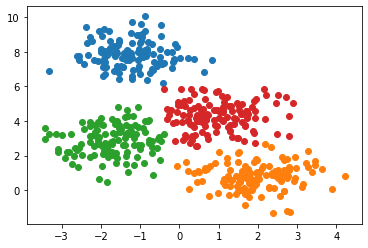

In [ ]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4)

# fit model and predict clusters
y_pred = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(y_pred)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_pred == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show the plot
plt.show()

## <font color='red'>5. Clustering Evaluation</font>

**Three important factors by which clustering can be evaluated are:**
<ul>
<li>Clustering Tendency
<li>Optimal Number of Clusters
<li>Clustering Quality
<ul>
    <li>Extrinsic Measures
    <li>Intrinsic Measures
</ul>
</ul>

### <font color='red'>5.1. Clustering Tendency</font>

Before evaluating the clustering performance, making sure that data set we are working has clustering tendency and **does not contain uniformly distributed points** is very important. If the data does not contain clustering tendency, then clusters identified by any state of the art clustering algorithms may be irrelevant. **Non-uniform distribution of points in data set becomes important in clustering.**

To solve this, <font color='blue'>Hopkins test</font>, a statistical test for spatial randomness of a variable, can be used to measure the probability of data points generated by uniform data distribution.

<ul>
    <li><b>Null Hypothesis (Ho)</b> : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
    <li><b>Alternate Hypothesis (Ha)</b>: Data points are generated by random data points (presence of clusters)
</ul>

If the test is positve (an hopkins score which tends to 0) it means that the data is not uniformly distributed. Hence clustering can be useful to classify the observations. However, if the score is too high (above 0.3 for exemple); the data is uniformly distributed and clustering can’t be really useful for the problem at hand.

In [ ]:
from pyclustertend import hopkins

print("The hopkins score of the dataset is: %.3f" %hopkins(X, sample_size))

The hopkins score of the dataset is: 0.199


### <font color='red'>5.2. Optimal Number of Clusters</font>

Some of the clustering algorithms like **K-means**, require number of clusters, k, as clustering parameter. Getting the optimal number of clusters is very significant in the analysis. If k is too high, each point will broadly start representing a cluster and if k is too low, then data points are incorrectly clustered. Finding the optimal number of clusters leads to granularity in clustering.

There is no definitive answer for finding right number of cluster as it depends upon: 
<ol>
    <li>Distribution shape 
    <li>Scale in the data set
    <li>Clustering resolution required by user.
</ol>
Although finding number of clusters is a very subjective problem. There are two major approaches to find optimal number of clusters:
<ol>
<li>Domain knowledge
<li>Data driven approach
</ol>

<blockquote><b>Domain knowledge —</b>Domain knowledge might give some prior knowledge on finding number of clusters. For example, in case of clustering iris data set, if we have the prior knowledge of species (sertosa, virginica, versicolor) , then k = 3. Domain knowledge driven k value gives more relevant insights.</blockquote>
<blockquote><b>Data driven approach —</b> If the domain knowledge is not available, mathematical methods help in finding out right number of clusters.</blockquote>

**1. Empirical Method:**<br>
A simple empirical method of finding number of clusters is **Square root of N/2** where **N is total number of data points**, so that each cluster contains square root of 2 * N

The number of optimal clusters using the empirical method is: 15


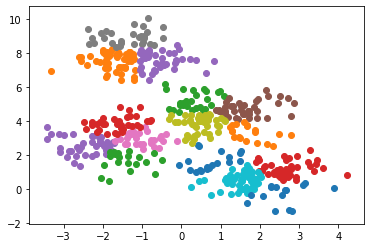

In [ ]:
import math

n_cluster_emp = math.sqrt(sample_size/2)

print("The number of optimal clusters using the empirical method is: %d" %n_cluster_emp)

# define the model
kmeans = KMeans(n_clusters= int(n_cluster_emp), random_state= 6)

# fit model and predict clusters
y_pred_emp = kmeans.fit_predict(X)

# retrieve unique clusters
clusters = unique(y_pred_emp)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_pred_emp == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show the plot
plt.show()

**2. Elbow Method:**<br>
Within-cluster variance is a measure of compactness of the cluster. Lower the value of within cluster variance, higher the compactness of cluster formed.

Sum of within-cluster variance, W, is calculated for clustering analyses done with different values of k. W is a cumulative measure how good the points are clustered in the analysis. Plotting the k values and their corresponding sum of within-cluster variance helps in finding the number of clusters.

WCSS or SSE is calculated as the sum of the squared distance between each datapoint and its allocated cluster centroid. If all datapoints are tightly congregated around their allocated centroid, then the SSE will be low — otherwise, it will be high.

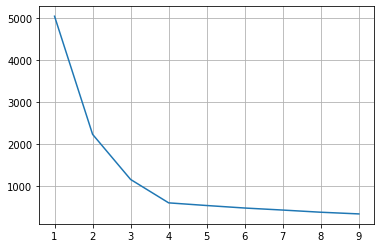

In [ ]:
wcss = []
for K in range(1, 10):
    model = KMeans(n_clusters=K)
    model.fit(X)
    wcss.append(model.inertia_)
    
plt.plot(np.linspace(1,9,9), wcss)
plt.grid()
plt.show()

### <font color='red'>5.3. Clustering Quality</font>

Once clustering is done, **how well the clustering has performed** can be quantified by a **number of metrics**. Ideal clustering is characterised by <font color='blue'>minimal intra cluster distance</font> and <font color='blue'>maximal inter cluster distance.</font>

There are majorly two types of measures to assess the clustering performance.

### <font color='red'>5.3.1. Extrinsic Measures</font>

Measures which **require ground truth labels**. Examples are Adjusted Rand index, Fowlkes-Mallows scores, Mutual information based scores, Homogeneity, Completeness and V-measure.

<b><font color='red'>Note:</font></b> Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric **should not take the absolute values of the cluster labels into account** but rather if this clustering **define separations of the data similar to some ground truth set of classes** or **satisfying some assumption such that members belong to the same class are more similar than members of different classes according to some similarity metric**.

### <font color='blue'>5.3.1.1. Adjusted Rand Index</font>

**Adjusted Rand index** is a function that measures the **similarity** of the two assignments, ignoring permutations and **with chance normalization**
<ul>
<li>Perfect labeling is scored 1.0
<li>Bad (e.g. independent labelings) have negative or close to 0.0 scores:
</ul>

In [ ]:
from sklearn import metrics

print("Adjusted Rand Index is: %.3f" %metrics.adjusted_rand_score(y, y_pred))

Adjusted Rand Index is: 0.968


![alt text](./images/3.png "Title")

### <font color='blue'>5.3.1.2. Mutual Information based scores</font>

**The Mutual Information** is a function that measures the **agreement** of the two assignments, ignoring permutations. Two different normalized versions of this measure are available, **Normalized Mutual Information (NMI)** and **Adjusted Mutual Information (AMI)**. NMI is often used in the literature, while AMI was proposed more recently and is **normalized against chance**:
<ul>
<li>Perfect labeling is scored 1.0
<li>Bad (e.g. independent labelings) have non-positive scores:
</ul>

In [ ]:
print("Adjusted Mutual Information score is: %.3f" %metrics.adjusted_mutual_info_score(y, y_pred))

print("Normalized Mutual Information score is: %.3f" %metrics.normalized_mutual_info_score(y, y_pred))

Adjusted Mutual Information score is: 0.953
Normalized Mutual Information score is: 0.954


![alt text](./images/4.png "Title")

### <font color='blue'>5.3.1.3. Homogenity, Completeness, and V-measure</font>

Given the knowledge of the ground truth class assignments of the samples, it is possible to define some intuitive metric using conditional entropy analysis.

In particular Rosenberg and Hirschberg (2007) define the following two desirable objectives for any cluster assignment:

<ul>
    <li><b>homogeneity:</b> each cluster contains only members of a single class.
    <li><b>completeness:</b> all members of a given class are assigned to the same cluster.
</ul>

We can turn those concept as scores **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score">homogenity_score</a>** and **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score">completeness_score</a>**. Both are bounded below by 0.0 and above by 1.0 (higher is better)

In [ ]:
print("Homogenity score is: %.3f" %metrics.homogeneity_score(y, y_pred))

print("Completeness score is: %.3f" %metrics.completeness_score(y, y_pred))

Homogenity score is: 0.954
Completeness score is: 0.954


Their harmonic mean called **V-measure** is computed by **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score">v_measure_score</a>**:


In [ ]:
print("V-measure score is: %.3f" %metrics.v_measure_score(y,y_pred))

V-measure score is: 0.954


This function’s formula is as follows:


## <center> $v = \frac{(1 + \beta) \times \text{homogeneity} \times \text{completeness}}{(\beta \times \text{homogeneity} + \text{completeness})}$ </center>

![alt text](./images/5.png "Title")

### <font color='blue'>5.3.1.4. Fowlkes-Mallows scores</font>

The Fowlkes-Mallows index **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score">(sklearn.metrics.fowlkes_mallows_score)</a>** can be used when the ground truth class assignments of the samples is known. The Fowlkes-Mallows score FMI is defined as the geometric mean of the pairwise precision and recall:

### <center> ${FMI} = \frac{\text{TP}}{\sqrt{(\text{TP} + \text{FP}) (\text{TP} + \text{FN})}} $</center>

Where `TP` is the number of **True Positive** (i.e. the number of pair of points that belong to the same clusters in both the true labels and the predicted labels), `FP` is the number of **False Positive** (i.e. the number of pair of points that belong to the same clusters in the true labels and not in the predicted labels) and `FN` is the number of **False Negative** (i.e the number of pair of points that belongs in the same clusters in the predicted labels and not in the true labels).

The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.



In [ ]:
print("Fowlkes-Malkows score is: %.3f" %metrics.fowlkes_mallows_score(y, y_pred)) 

Fowlkes-Malkows score is: 0.976


![alt text](6.png "Title")

### <font color='red'>5.3.2. Intrinsic Measures</font>

Measures that **does not require ground truth labels**. Some of the clustering performance measures are Silhouette Coefficient, Calinski-Harabasz Index, Davies-Bouldin Index etc.

### <font color='blue'>5.3.2.1. Silhouette Coefficient</font>

If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score">(sklearn.metrics.silhouette_score)</a>** is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:
<ul>
    <li><b>a: </b>The mean distance between a sample and all other points in the same class.
    <li><b>b: </b>The mean distance between a sample and all other points in the next nearest cluster.
</ul>

The Silhouette Coefficient s for a single sample is then given as:

## <center>$s = \frac{b - a}{max(a, b)}$</center>

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

In [ ]:
print("Silhouette Score is: %.3f" %metrics.silhouette_score(X, y_pred, metric='euclidean'))   

Silhouette Score is: 0.583


![alt text](./images/7.png "Title")

### <font color='blue'>5.3.2.2. Calinski-Harabasz Index</font>

If the ground truth labels are not known, the Calinski-Harabasz index **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score">(sklearn.metrics.calinski_harabasz_score)</a>** - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared)

In [ ]:
print("Calinski-Harabasz Index is: %.3f" %metrics.calinski_harabasz_score(X, y_pred))

Calinski-Harabasz Index is: 1215.497


![alt text](./images/8.png "Title")

### <font color='blue'>5.3.2.3. Davies Bouldin Index</font>

If the ground truth labels are not known, the Davies-Bouldin index **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score">(sklearn.metrics.davies_bouldin_score)</a>** can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [ ]:
print("Davies-Bouldin Index is: %.3f" %metrics.davies_bouldin_score(X, y_pred))

Davies-Bouldin Index is: 0.582


![alt text](./images/9.png "Title")

### <font color='blue'>5.3.2.4. Contingency Matrix</font>

Contingency matrix **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cluster.contingency_matrix.html#sklearn.metrics.cluster.contingency_matrix">(sklearn.metrics.cluster.contingency_matrix)</a>** reports the intersection cardinality for every true/predicted cluster pair. The contingency matrix provides sufficient statistics for all clustering metrics where the samples are independent and identically distributed and one doesn’t need to account for some instances not being clustered.

In [ ]:
print("Contingency Matrix:\n")
print(metrics.cluster.contingency_matrix(y, y_pred))

Contingency Matrix:

[[123   0   1   1]
 [  3   0 122   0]
 [  2   0   2 121]
 [  0 125   0   0]]


![alt text](./images/10.png "Title")

In [ ]:
from time import time

def clustering_fit_stats(estimator, name, data):
    
    t0 = time()
    y_pred = estimator.fit_predict(data)
    
    print('%-9s\t%.3fs\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f  %.3f'
          % (name, (time() - t0),
             metrics.adjusted_rand_score(y, y_pred),
             metrics.adjusted_mutual_info_score(y, y_pred),
             metrics.normalized_mutual_info_score(y, y_pred),
             metrics.homogeneity_score(y, y_pred),
             metrics.completeness_score(y, y_pred),
             metrics.v_measure_score(y,y_pred),
             metrics.silhouette_score(X, y_pred, metric='euclidean'),
             metrics.calinski_harabasz_score(X, y_pred),
             metrics.davies_bouldin_score(X, y_pred)))
    
def clustering_plot(estimator, data):

    # fit model and predict clusters
    y_pred = estimator.fit_predict(data)

    # retrieve unique clusters
    clusters = np.unique(y_pred)

    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(y_pred == cluster)
        # create scatter of these samples
        plt.scatter(data[row_ix, 0], data[row_ix, 1])

    plt.show()



type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
K-means5 	0.037s	0.843	0.856	0.857	0.915	0.807	0.857	0.510	1032.683  0.782
K-means4 	0.035s	0.968	0.953	0.954	0.954	0.954	0.954	0.583	1215.497  0.582
K-means3 	0.029s	0.688	0.794	0.795	0.698	0.924	0.795	0.525	831.898  0.713
K-means2 	0.034s	0.322	0.517	0.519	0.368	0.878	0.519	0.513	626.234  0.610


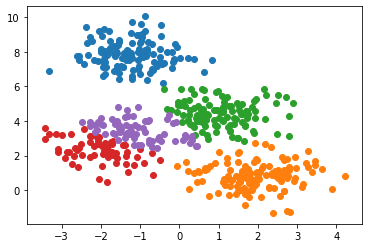

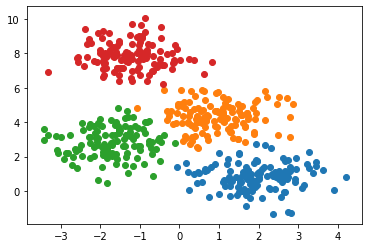

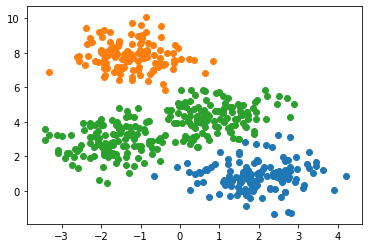

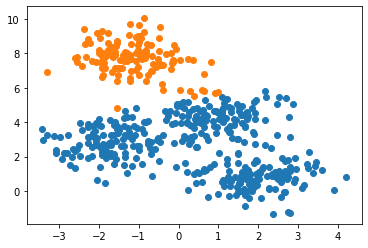

In [ ]:
print('\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')

clustering_fit_stats(KMeans(n_clusters= 5, random_state= 6), name="K-means5", data= X)
clustering_fit_stats(KMeans(n_clusters= 4, random_state= 6), name="K-means4", data= X)
clustering_fit_stats(KMeans(n_clusters= 3, random_state= 6), name="K-means3", data= X)
clustering_fit_stats(KMeans(n_clusters= 2, random_state= 6), name="K-means2", data= X)

clustering_plot(KMeans(n_clusters= 5), X)
clustering_plot(KMeans(n_clusters= 4), X)
clustering_plot(KMeans(n_clusters= 3), X)
clustering_plot(KMeans(n_clusters= 2), X)



type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
K-means  	0.040s	0.843	0.856	0.857	0.915	0.807	0.857	0.510	1032.683  0.782
Agglomerative	0.010s	0.922	0.904	0.905	0.905	0.905	0.905	0.575	1184.745  0.584
DBSCAN   	0.005s	0.729	0.738	0.741	0.814	0.680	0.741	0.367	263.681  2.322
GMM      	0.007s	0.953	0.933	0.933	0.933	0.933	0.933	0.583	1213.480  0.584


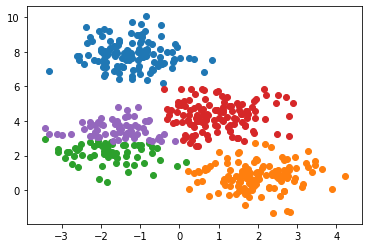

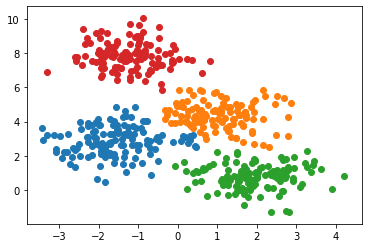

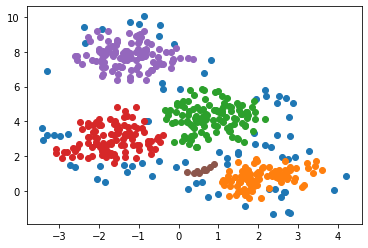

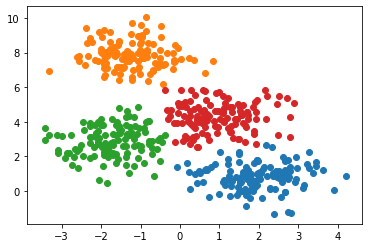

In [ ]:
print('\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')

clustering_fit_stats(KMeans(n_clusters= 5, random_state= 6), name="K-means", data= X)
clustering_fit_stats(AgglomerativeClustering(n_clusters=4) , name="Agglomerative", data= X)
clustering_fit_stats(DBSCAN(eps= 0.4, min_samples= 6), name="DBSCAN", data= X)
clustering_fit_stats(GaussianMixture(n_components= 4), name="GMM", data= X)
                     
clustering_plot(KMeans(n_clusters= 5), X)
clustering_plot(AgglomerativeClustering(n_clusters=4), X)
clustering_plot(DBSCAN(eps= 0.4, min_samples= 6), X)
clustering_plot(GaussianMixture(n_components= 4), X)

## Useful Links:<br>

**1. <a href="https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation">Clustering (Scikit-Learn)</a>**    

**2. <a href="https://towardsdatascience.com/clustering-evaluation-strategies-98a4006fcfc">Clustering Evalaution Strategies</a>**

**2. <a href="https://machinelearningmastery.com/clustering-algorithms-with-python/">10 Clustering Algorithms with Python</a>**

### Good Luck!
